In this Jupyter Notebook, Using the Netflix Dataset (netflix_titles.csv) I will be performing the following operations.

### Big Data Analytics Operations
1. Data Understanding & Pre-processing
2. Data Wrangling Operations
3. Descriptive Analytics
4. Diagnostic Analytics
5. Predictive Analytics
6. Recommendations and Conclusions

### Data Understanding and & Pre-processing
#### Task Summary
* I uploaded the required libarries and imported the dataset.
* I Checked the shape of the dataset and reviewed it's features.
* I renamed the features.
* I handled missing data

In [ ]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For general data modeling
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# For regression algorithms modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# For classification algorithms modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For recommendation engine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [ ]:
# Load the Netflix dataset
netflix = pd.read_csv("netflix_titles.csv")

# View Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Display first 3 rows to quickly inspect the structure and contents
netflix.head(3)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
# Display columns with missing Values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Handling missing data by dropping rows with null values
netflix.dropna(axis=0, inplace=True)

# Confirming that there are no columns with missing Values
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Rename columns to proper names for better readability
netflix.columns = ["Show ID", "Type", "Title", "Director", "Cast",
                   "Country", "Date Added", "Release Year", "Rating",
                   "Duration", "Listed In", "Description"]

In [ ]:
# Converting data types to appropriate formats
netflix = netflix.astype({'Show ID': 'string', 'Type': 'category', 'Title': 'string',
                          'Cast': 'category', 'Director': 'category',
                          'Country': 'category',
                          'Rating': 'category', 'Duration': 'category',
                          'Listed In': 'category', 'Description': 'string'})

netflix['Date Added'] = pd.to_datetime(netflix['Date Added'], format='mixed')

In [ ]:
# Extracting month, and year from Date Added
netflix["Month Added"] = netflix["Date Added"].dt.month_name()
netflix["Year Added"] = netflix["Date Added"].dt.year

In [ ]:
# Dropping unnecessary columns
columns_to_drop = ["Cast", "Date Added"]
netflix.drop(columns=columns_to_drop, inplace=True)

netflix.columns

Index(['Show ID', 'Type', 'Title', 'Director', 'Country', 'Release Year',
       'Rating', 'Duration', 'Listed In', 'Description', 'Month Added',
       'Year Added'],
      dtype='object')

<ipython-input-10-4b6ee3fe0872>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=netflix_Year_2000_2021['Release Year'], palette='viridis')


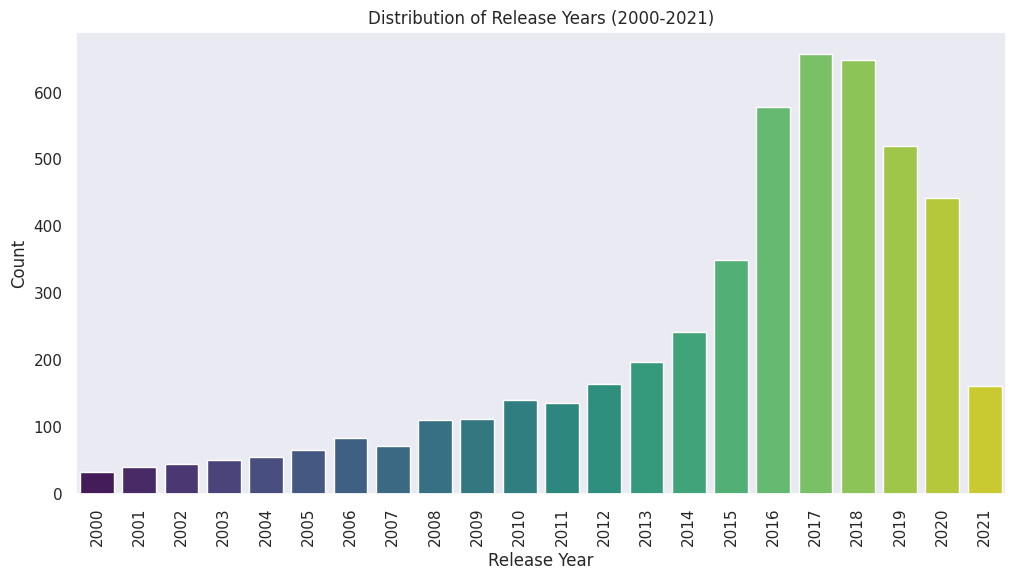

In [ ]:
# Distribution of Release Year from 2000 to 2021

netflix_Year_2000_2021 = netflix[netflix['Release Year'].between(2000, 2021)]

sns.set(style="dark")
plt.figure(figsize=(12, 6))
sns.countplot(x=netflix_Year_2000_2021['Release Year'], palette='viridis')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years (2000-2021)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Stastistics for Release Year

# Calculate the mean, median, and mode of the "Release Year" column
mean = netflix_Year_2000_2021['Release Year'].mean()
median = netflix_Year_2000_2021['Release Year'].median()
mode = netflix_Year_2000_2021['Release Year'].mode()[0]
maximum = netflix_Year_2000_2021['Release Year'].max()
minimum = netflix_Year_2000_2021['Release Year'].min()

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Maximum:", maximum)
print("Minimum:", minimum)


Mean: 2015.1040686976078
Median: 2016.0
Mode: 2017
Maximum: 2021
Minimum: 2000


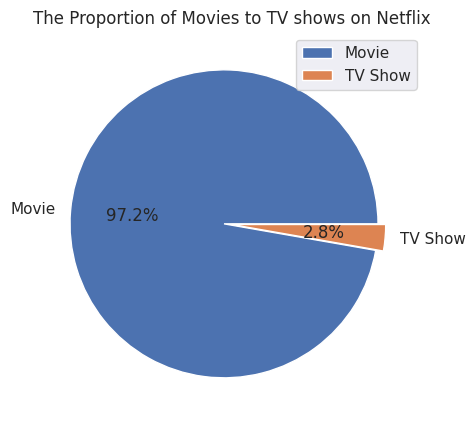

In [ ]:
# Proportion of Movies to TV shows on Netflix
netflix_type_count = netflix.groupby("Type")["Show ID"].count()
plt.figure(figsize=(8, 5))
plt.pie(netflix_type_count, labels=netflix_type_count.index, autopct='%1.1f%%', explode=(0.05, 0.0))
plt.title('The Proportion of Movies to TV shows on Netflix')
plt.legend(['Movie', 'TV Show'], loc="best")
plt.show()

Year Added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      14
2015      47
2016     195
2017     702
2018    1085
2019    1236
2020    1151
2021     729
dtype: int64


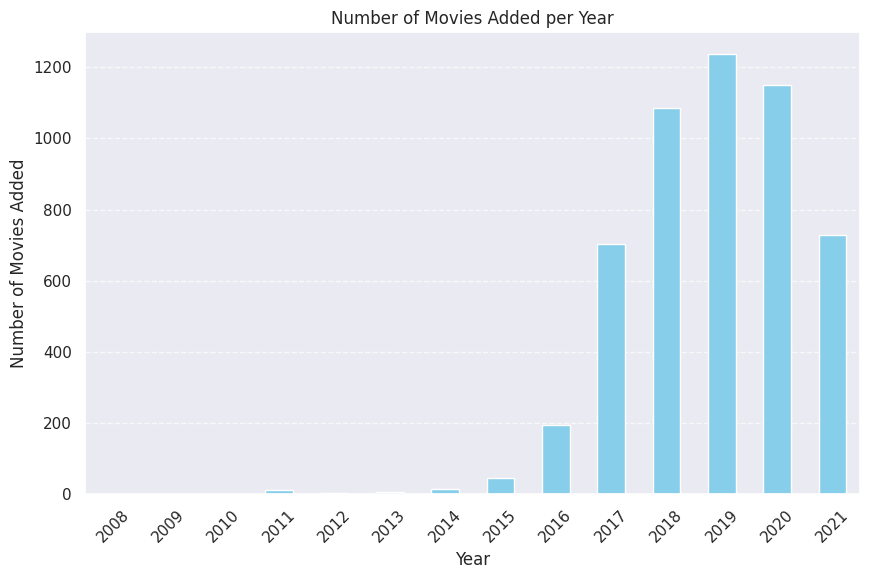

In [ ]:
# Number of movies added per year
netflix_movies = netflix[netflix["Type"] == "Movie"]
netflix_tv = netflix[netflix["Type"] == "TV Show"]
movie_added = netflix_movies.groupby("Year Added").size()
print(movie_added)

plt.figure(figsize=(10, 6))
movie_added.plot(kind="bar", color="skyblue")
plt.title("Number of Movies Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Added")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Year Added
2013     1
2015     3
2016     7
2017    22
2018    16
2019    29
2020    43
2021    26
dtype: int64


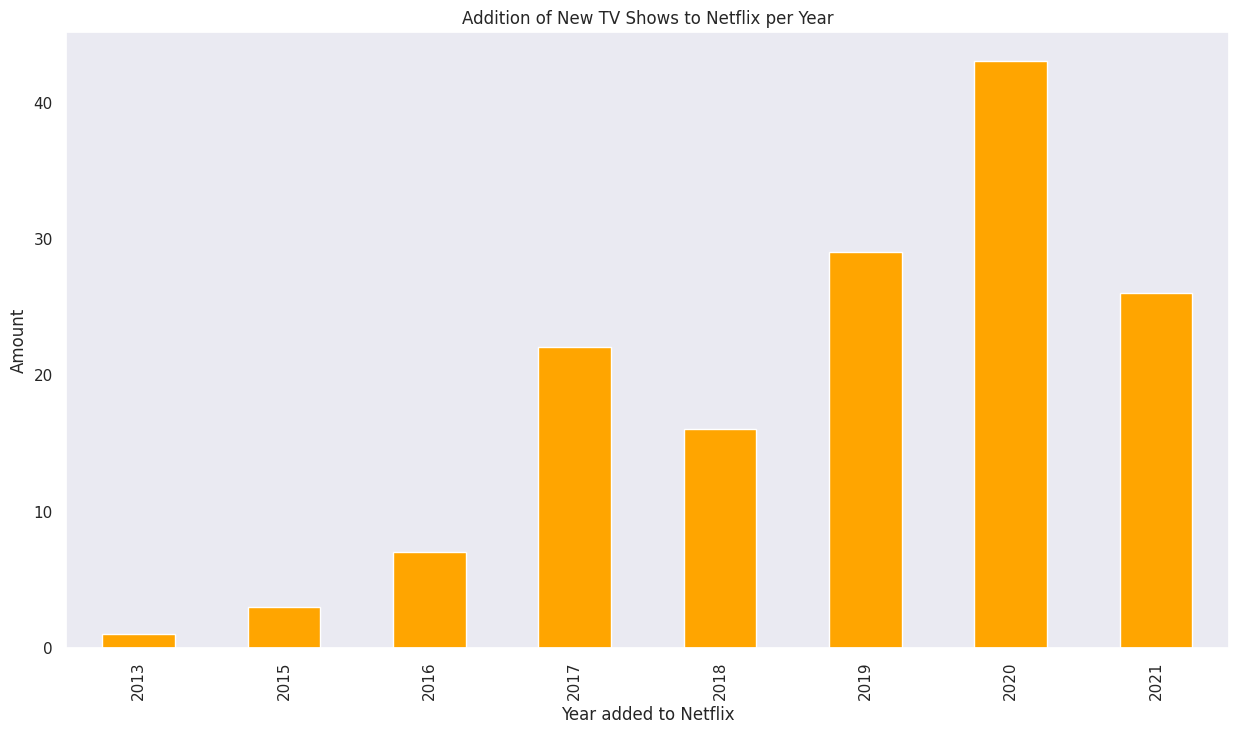

In [ ]:
# Number of TV shows added each year
tv_added = netflix_tv.groupby('Year Added').size()
print(tv_added)

plt.figure(figsize=(15, 8))
tv_added.plot(kind='bar', color='orange')
plt.xlabel('Year added to Netflix')
plt.ylabel('Amount')
plt.title('Addition of New TV Shows to Netflix per Year')
plt.show()

Month Added
October      480
January      478
December     473
April        460
March        454
November     452
July         451
August       434
September    416
June         403
May          357
February     327
dtype: int64


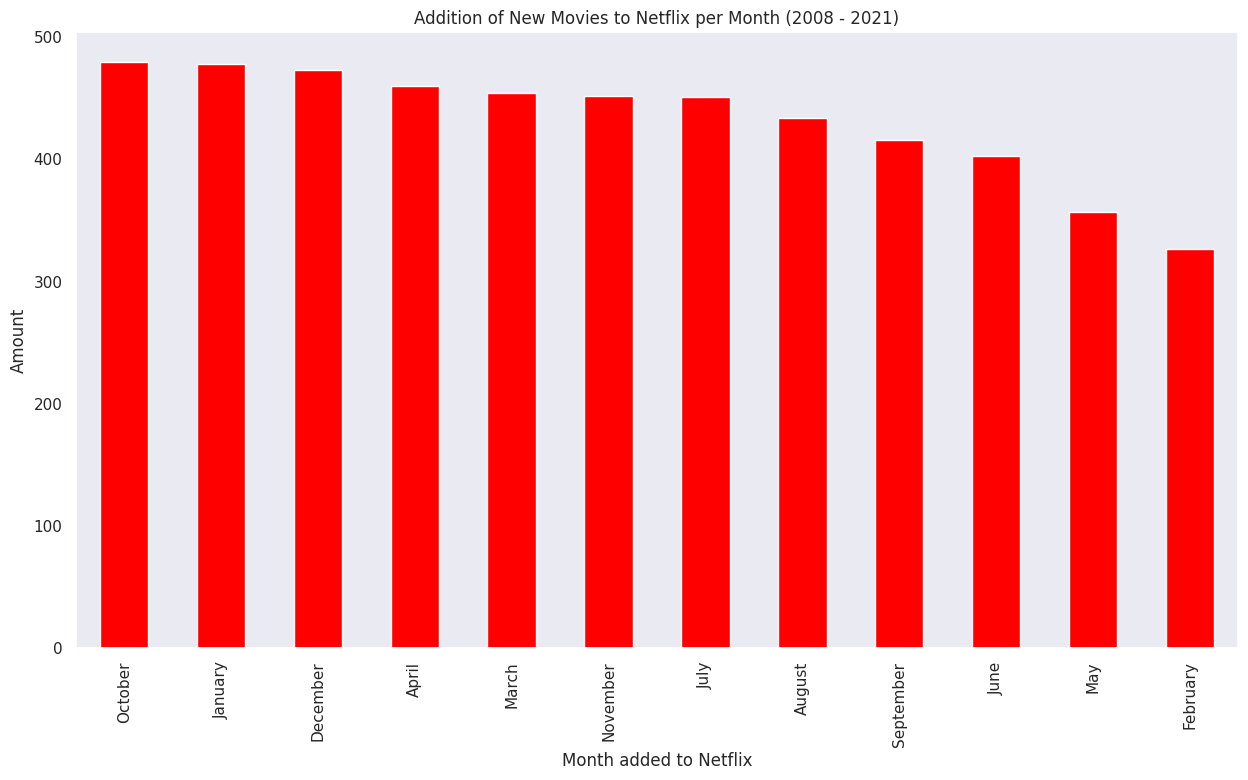

In [ ]:
# Months with the highest number of new movies and TV shows (2008 - 2021)
movie_month = netflix_movies.groupby('Month Added').size().sort_values(ascending=False)
print(movie_month)

plt.figure(figsize=(15, 8))
movie_month.plot(kind='bar', color='red')
plt.xlabel('Month added to Netflix')
plt.ylabel('Amount')
plt.title('Addition of New Movies to Netflix per Month (2008 - 2021)')
plt.show()

Month Added
December     17
August       15
March        15
February     14
July         13
June         12
April        11
January      11
May          11
October      11
September    11
November      6
dtype: int64


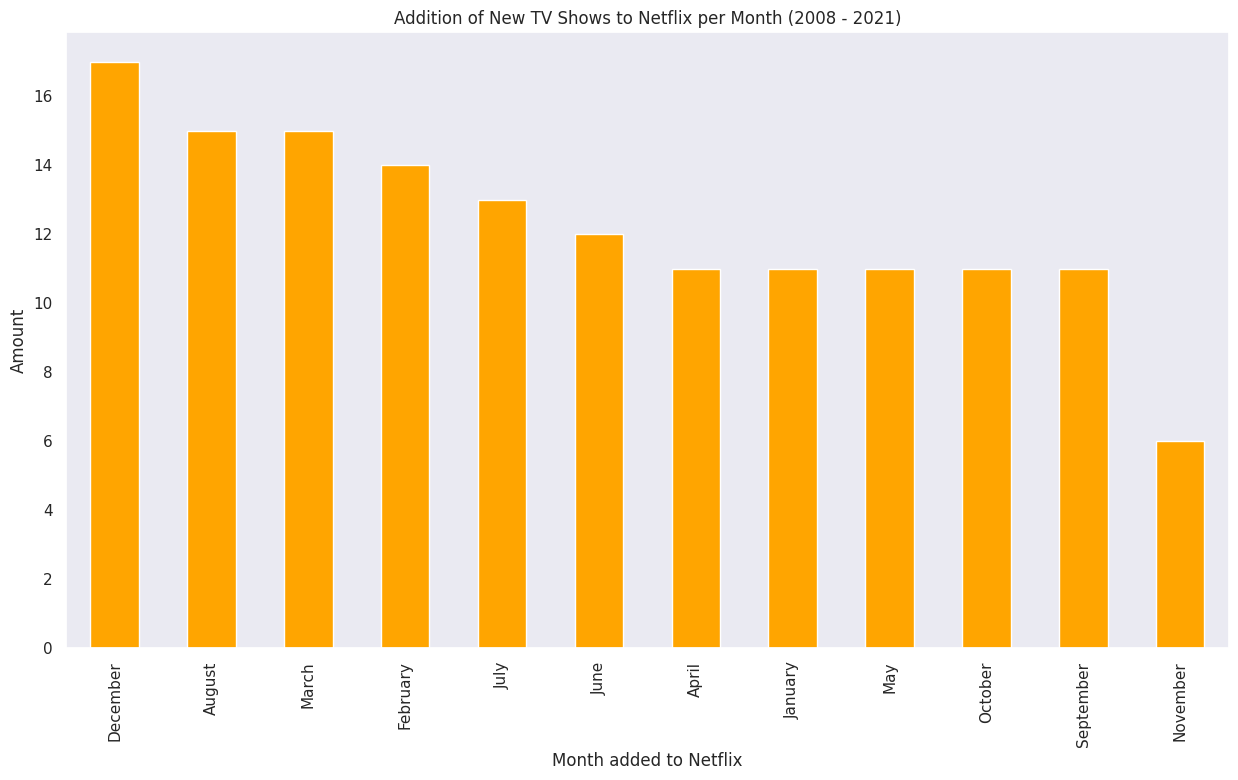

In [ ]:
# TV Shows
tv_month = netflix_tv.groupby('Month Added').size().sort_values(ascending=False)
print(tv_month)

plt.figure(figsize=(15, 8))
tv_month.plot(kind='bar', color='orange')
plt.xlabel('Month added to Netflix')
plt.ylabel('Amount')
plt.title('Addition of New TV Shows to Netflix per Month (2008 - 2021)')
plt.show()

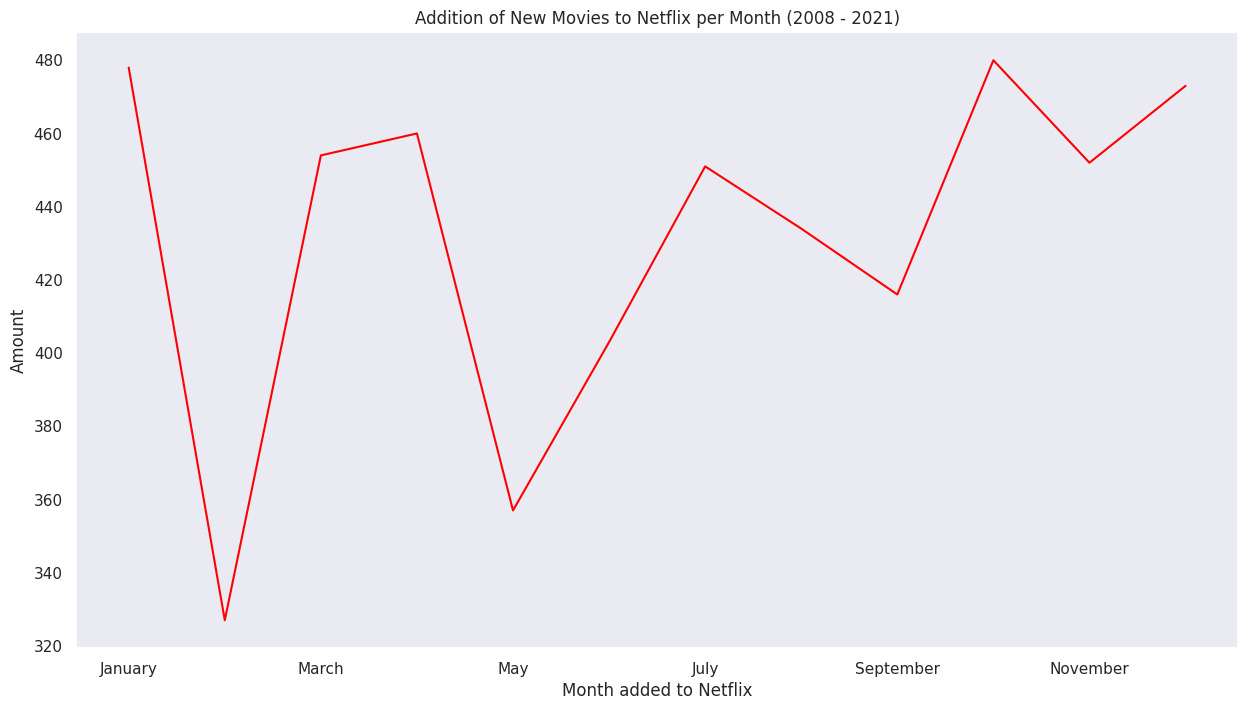

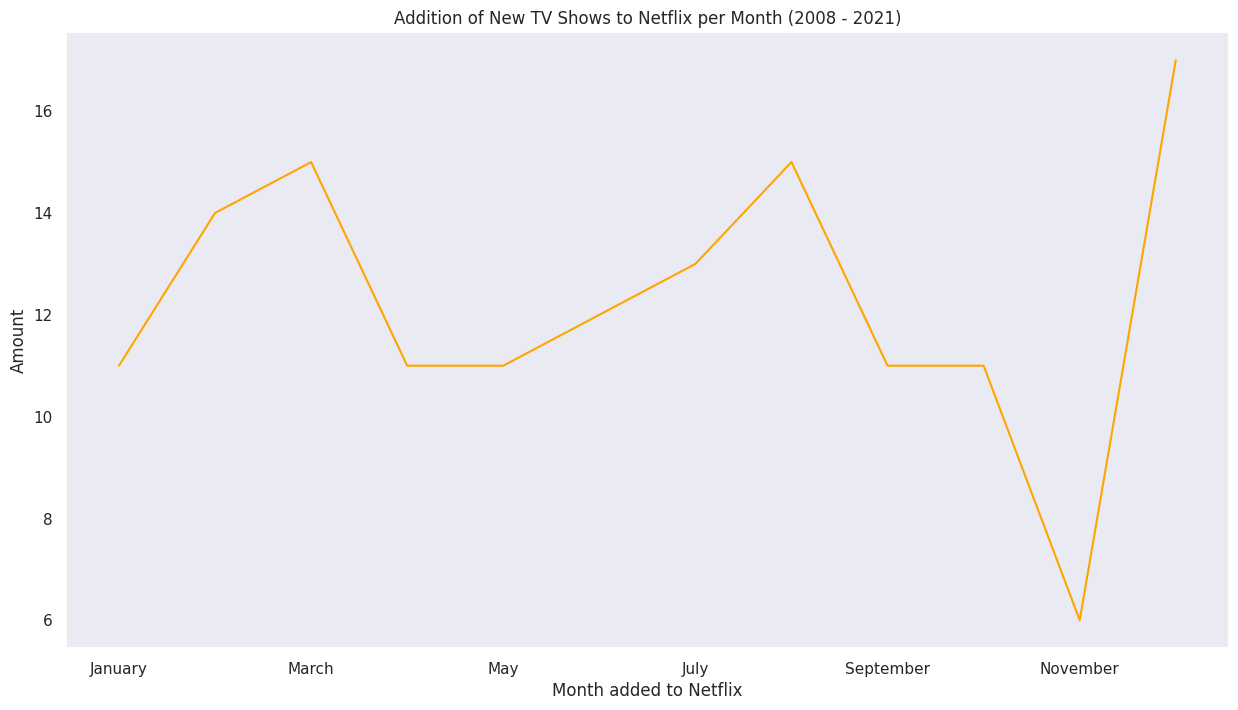

In [ ]:
# Trend
order_month = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
order_mov = netflix_movies['Month Added'].value_counts()[order_month]
order_tv = netflix_tv['Month Added'].value_counts()[order_month]

plt.figure(figsize=(15, 8))
order_mov.plot(label="Movies", color='red')
plt.xlabel('Month added to Netflix')
plt.ylabel('Amount')
plt.title('Addition of New Movies to Netflix per Month (2008 - 2021)')
plt.show()

plt.figure(figsize=(15, 8))
order_tv.plot(label="TV Shows", color='orange')
plt.xlabel('Month added to Netflix')
plt.ylabel('Amount')
plt.title('Addition of New TV Shows to Netflix per Month (2008 - 2021)')
plt.show()

In [ ]:
# Sentiment Analysis of Netflix Description

# Importing necessary libraries for sentiment analysis
from textblob import TextBlob

# Applying sentiment analysis to the description column
netflix['Description'] = netflix['Description'].astype(str)
netflix['Sentiment'] = netflix['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Viewing the first few rows of the new DataFrame
netflix.head(2)

,Show ID,Type,Title,Director,Country,Release Year,Rating,Duration,Listed In,Description,Month Added,Year Added,Sentiment
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021,-0.083333
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,September,2021,0.612500


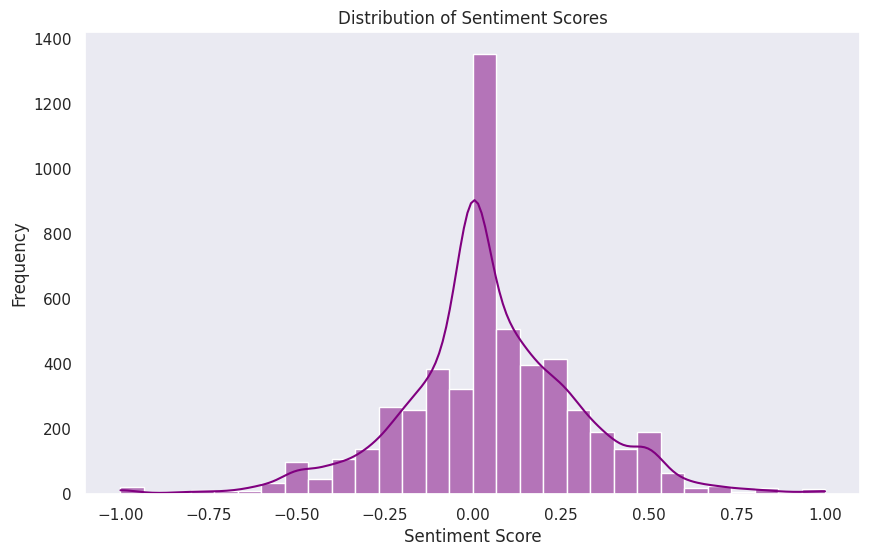

In [ ]:
# Checking the distribution of sentiment scores
plt.figure(figsize=(10,6))
sns.histplot(netflix['Sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# Identifying positive, negative, and neutral sentiments
def sentiment_category(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

netflix['Sentiment_Category'] = netflix['Sentiment'].apply(sentiment_category)

<ipython-input-26-106171d9551e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category', data=netflix, palette='coolwarm')


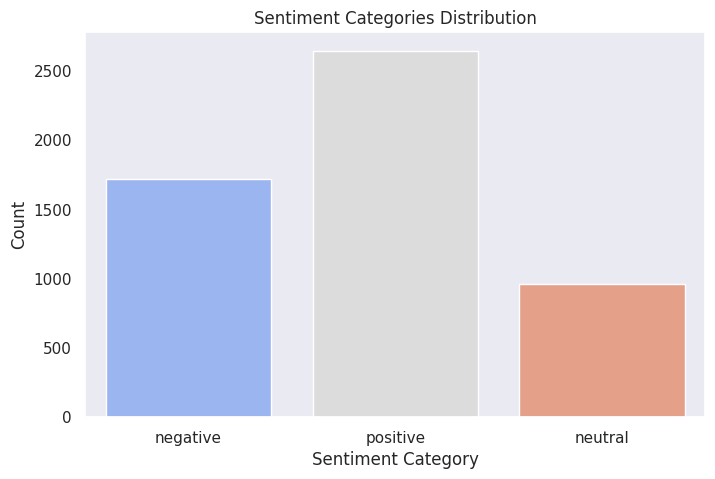

In [ ]:
# Plotting the sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment_Category', data=netflix, palette='coolwarm')
plt.title('Sentiment Categories Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Model Building

# Defining the independent and dependent variables
X = netflix[['Release Year', 'Year Added']]
y = netflix['Sentiment']

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the models
lin_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
knn_reg = KNeighborsRegressor()
rf_reg = RandomForestRegressor()

In [ ]:
# Training the models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicting using the trained models
lin_reg_preds = lin_reg.predict(X_test)
ridge_reg_preds = ridge_reg.predict(X_test)
lasso_reg_preds = lasso_reg.predict(X_test)
knn_reg_preds = knn_reg.predict(X_test)
rf_reg_preds = rf_reg.predict(X_test)

In [ ]:
# Evaluating the models
models = [lin_reg, ridge_reg, lasso_reg, knn_reg, rf_reg]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
               'KNN Regression', 'Random Forest Regression']
for model, name in zip(models, model_names):
    print(name)
    print('RMSE:', np.sqrt(np.mean((model.predict(X_test) - y_test) ** 2)))
    print('MAE:', np.mean(np.abs(model.predict(X_test) - y_test)))
    print()

Linear Regression
RMSE: 0.27115771609847594
MAE: 0.19952363523318198

Ridge Regression
RMSE: 0.2711576398175662
MAE: 0.1995235881069563

Lasso Regression
RMSE: 0.27043259951422743
MAE: 0.1989851934602824

KNN Regression
RMSE: 0.2887341417514028
MAE: 0.21417861804012228

Random Forest Regression
RMSE: 0.28099738791106577
MAE: 0.2069348653543504



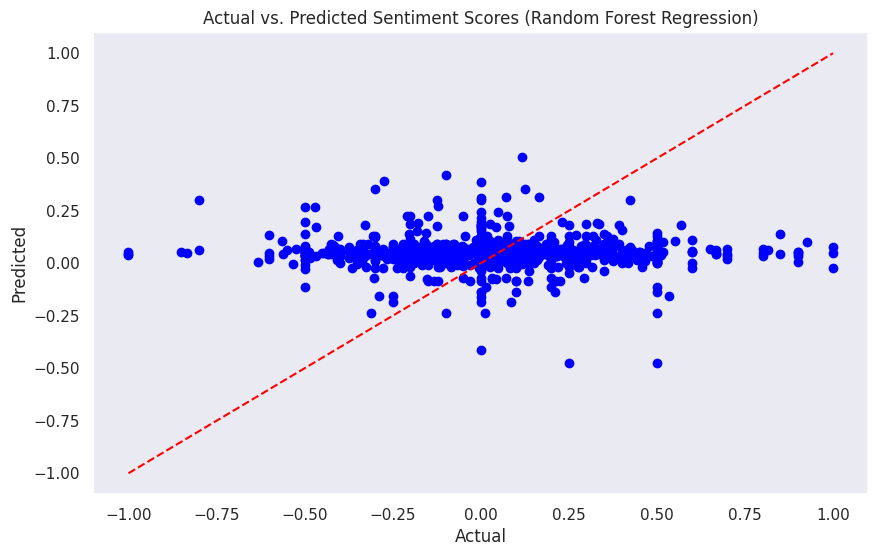

In [ ]:
# Plotting predictions against actual values for Random Forest Regression
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_reg_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sentiment Scores (Random Forest Regression)')
plt.show()

# Classifying Sentinent Category Using Classification Models

In [ ]:
# Mapping sentiment category to numerical values
sentiment_map = {'positive': 1, 'negative': -1, 'neutral': 0}
netflix['Sentiment_Category'] = netflix['Sentiment_Category'].map(sentiment_map)

In [ ]:
# Defining independent and dependent variables for classification
X_cls = netflix[['Release Year', 'Year Added']]
y_cls = netflix['Sentiment_Category']

In [ ]:
# Splitting the dataset into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [ ]:
# Initializing the classification models
log_reg = LogisticRegression(max_iter=1000)
knn_cls = KNeighborsClassifier()
rf_cls = RandomForestClassifier()
svm_cls = SVC()

In [ ]:
# Training the classification models
log_reg.fit(X_train_cls, y_train_cls)
knn_cls.fit(X_train_cls, y_train_cls)
rf_cls.fit(X_train_cls, y_train_cls)
svm_cls.fit(X_train_cls, y_train_cls)

SVC()

In [ ]:
# Predicting using the trained classification models
log_reg_preds = log_reg.predict(X_test_cls)
knn_cls_preds = knn_cls.predict(X_test_cls)
rf_cls_preds = rf_cls.predict(X_test_cls)
svm_cls_preds = svm_cls.predict(X_test_cls)

In [ ]:
# Evaluating the classification models
from sklearn.metrics import classification_report

cls_models = [log_reg, knn_cls, rf_cls, svm_cls]
cls_model_names = ['Logistic Regression', 'KNN Classifier', 'Random Forest Classifier', 'SVM Classifier']
for cls_model, cls_name in zip(cls_models, cls_model_names):
    print(cls_name)
    print(classification_report(y_test_cls, cls_model.predict(X_test_cls)))
    print()

Logistic Regression
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       370
           0       0.00      0.00      0.00       192
           1       0.47      1.00      0.64       505

    accuracy                           0.47      1067
   macro avg       0.16      0.33      0.21      1067
weighted avg       0.22      0.47      0.30      1067


KNN Classifier
              precision    recall  f1-score   support

          -1       0.38      0.32      0.35       370
           0       0.18      0.12      0.15       192
           1       0.48      0.59      0.53       505

    accuracy                           0.41      1067
   macro avg       0.35      0.34      0.34      1067
weighted avg       0.39      0.41      0.40      1067


Random Forest Classifier
              precision    recall  f1-score   support

          -1       0.37      0.11      0.17       370
           0       0.20      0.02      0.04       192
           1 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       1.00      0.00      0.01       370
           0       0.00      0.00      0.00       192
           1       0.47      1.00      0.64       505

    accuracy                           0.47      1067
   macro avg       0.49      0.33      0.22      1067
weighted avg       0.57      0.47      0.31      1067




# Recommendation Engine

In [ ]:
# Transforming text data for recommendation engine
tfidf = TfidfVectorizer(stop_words='english')
netflix['Description'] = netflix['Description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix['Description'])

In [ ]:
# Computing cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Function to recommend similar movies or TV shows
def recommend(title, cosine_sim=cosine_sim):
    idx = netflix[netflix['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    show_indices = [i[0] for i in sim_scores]
    return netflix['Title'].iloc[show_indices]

In [ ]:
print(netflix.columns)

Index(['Show ID', 'Type', 'Title', 'Director', 'Country', 'Release Year',
       'Rating', 'Duration', 'Listed In', 'Description', 'Month Added',
       'Year Added', 'Sentiment', 'Sentiment_Category'],
      dtype='object')


In [ ]:
# Example recommendation
recommendations = recommend('House Party')
print(recommendations)

773                    The Girl and the Gun
7265    Lalbaug Parel: Zali Mumbai Sonyachi
2279                                Michael
2626                           The Lift Boy
3868                                  Laatu
8374                      The Jungle School
6244                          Barely Lethal
4345                        Once a Gangster
2584                               Material
8465                        The Prince & Me
Name: Title, dtype: string
